# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2003 Круглов Илья
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Алгоритм Флойда-Уоршелла
2, 8, 14, 20, 26 | Алгоритм Дейкстры
3, 9,15,21,27 | Алгоритм Беллмана-Форда
4, 10, 16, 22, 28 | Алгоритм Джонсона
5, 11, 17, 23, 29| Алгоритм Левита
6, 12, 18, 24, 30 | Алгоритм Йена



### Выполнение:

#### Реализация графа и метода для записи данных из файла в матрицу

In [ ]:
from networkx import DiGraph, planar_layout, draw, \
    draw_networkx_edges as draw_edges, \
    get_edge_attributes as get_attributes, \
    draw_networkx_edge_labels as draw_labels

from matplotlib.pyplot import show


# Запись данных из файла в матрицу
def get_matrix_from(file: str) -> [[float]]:
    with open(file) as lines:
        matrix = [[float(char) if char != '.' else float('Inf')
                   for char in line.split()]
                  for line in lines]
    return matrix


# Реализация графа
class Graph:

    # Инициализация
    def __init__(self, matrix: [[float]]):
        self.point_count = len(matrix)
        self.edges = [(i, j, matrix[i][j])
                      for j in range(self.point_count)
                      for i in range(self.point_count)
                      if matrix[i][j] != float('Inf')]

    # Поиск кратчайшего пути алгоритмом Беллмана-Форда
    def bellman_ford(self, start_point: int, end_point: int) -> ([int], float):
        parent = [None] * self.point_count
        distances = [float('Inf')] * self.point_count
        distances[start_point] = 0.0

        # Поиск расстояния
        for _ in range(self.point_count-1):
            for start, end, weight in self.edges:
                if distances[start] != float('Inf') and distances[start] + weight < distances[end]:
                    distances[end] = distances[start] + weight
                    parent[end] = start
        distance = distances[end_point]

        # Проверка на отрицательные циклы
        for start, end, weight in self.edges:
            if distances[start] != float('Inf') and distances[start] + weight < distances[end]:
                return None, float('Inf')

        # Восстановление пути
        if distance == float('Inf'):
            path = None
        else:
            path = [end_point]
            child = end_point
            while child != start_point:
                child = parent[child]
                path.append(child)

        return path, distance

    # Вывод в окне
    def display(self, path=None):
        visualizer = DiGraph()
        visualizer.add_weighted_edges_from(self.edges)

        layout = planar_layout(visualizer)
        draw(visualizer, with_labels='True', pos=layout)
        draw_labels(visualizer, layout, edge_labels=get_attributes(visualizer, 'weight'))

        if path is not None:
            path = [(path[i+1], path[i]) for i in range(len(path) - 1)]
            draw_edges(visualizer, pos=layout, edgelist=path, edge_color='red', arrowsize=16, width=2)
            draw_labels(visualizer, layout, edge_labels=get_attributes(visualizer, 'weight'))

        show()


#### Код задания

In [ ]:
from lab_6_files.graph import *
from compare import time_of


# Создание графа из файла
matrix = get_matrix_from('lab_6_files/matrix.data')
graph = Graph(matrix)

# Предварительный просмотр
print('Посмотрите на граф и выберите точки начала и конца пути.\nЧтобы продолжить, закройте окно.')
graph.display()

# Ввод точек, поиск кратчайшего маршрута
start_point, end_point = map(int, input('\nВведите две точки через пробел: ').split())
path, distance = graph.bellman_ford(start_point, end_point)

# Времени поиска маршрута
time = time_of(graph.bellman_ford, start_point, end_point)
print(f'\nВремя поиска: {time:.3f}')

# Вывод маршрута
if distance != float('Inf'):
    print(f'Кратчайшие расстояние от точки "{start_point}" до точки "{end_point}" = {distance}')
else:
    print(f'Невозможно построить кратчайший маршрут из точки "{start_point}" в точку "{end_point}"')
graph.display(path=path)


#### Использованное содержимое файла compare.py для подсчета времени выполнения функции

In [ ]:
import time


def time_of(function, func_arg, precision):
    summa = 0
    for i in range(precision):
        start = time.perf_counter()
        function(func_arg)
        end = time.perf_counter()
        summa += abs(end - start)

    return summa / precision * 1000


### Вывод

Сложность алгоритма равна O(VE), где V и E это количество вершин и ребер соответственно. Ниже представлена работа программы, скриншот с изображением выведенного графа и файла с заданными данными, а также таблица зависимости времени выполнения от количества ребер и вершин.

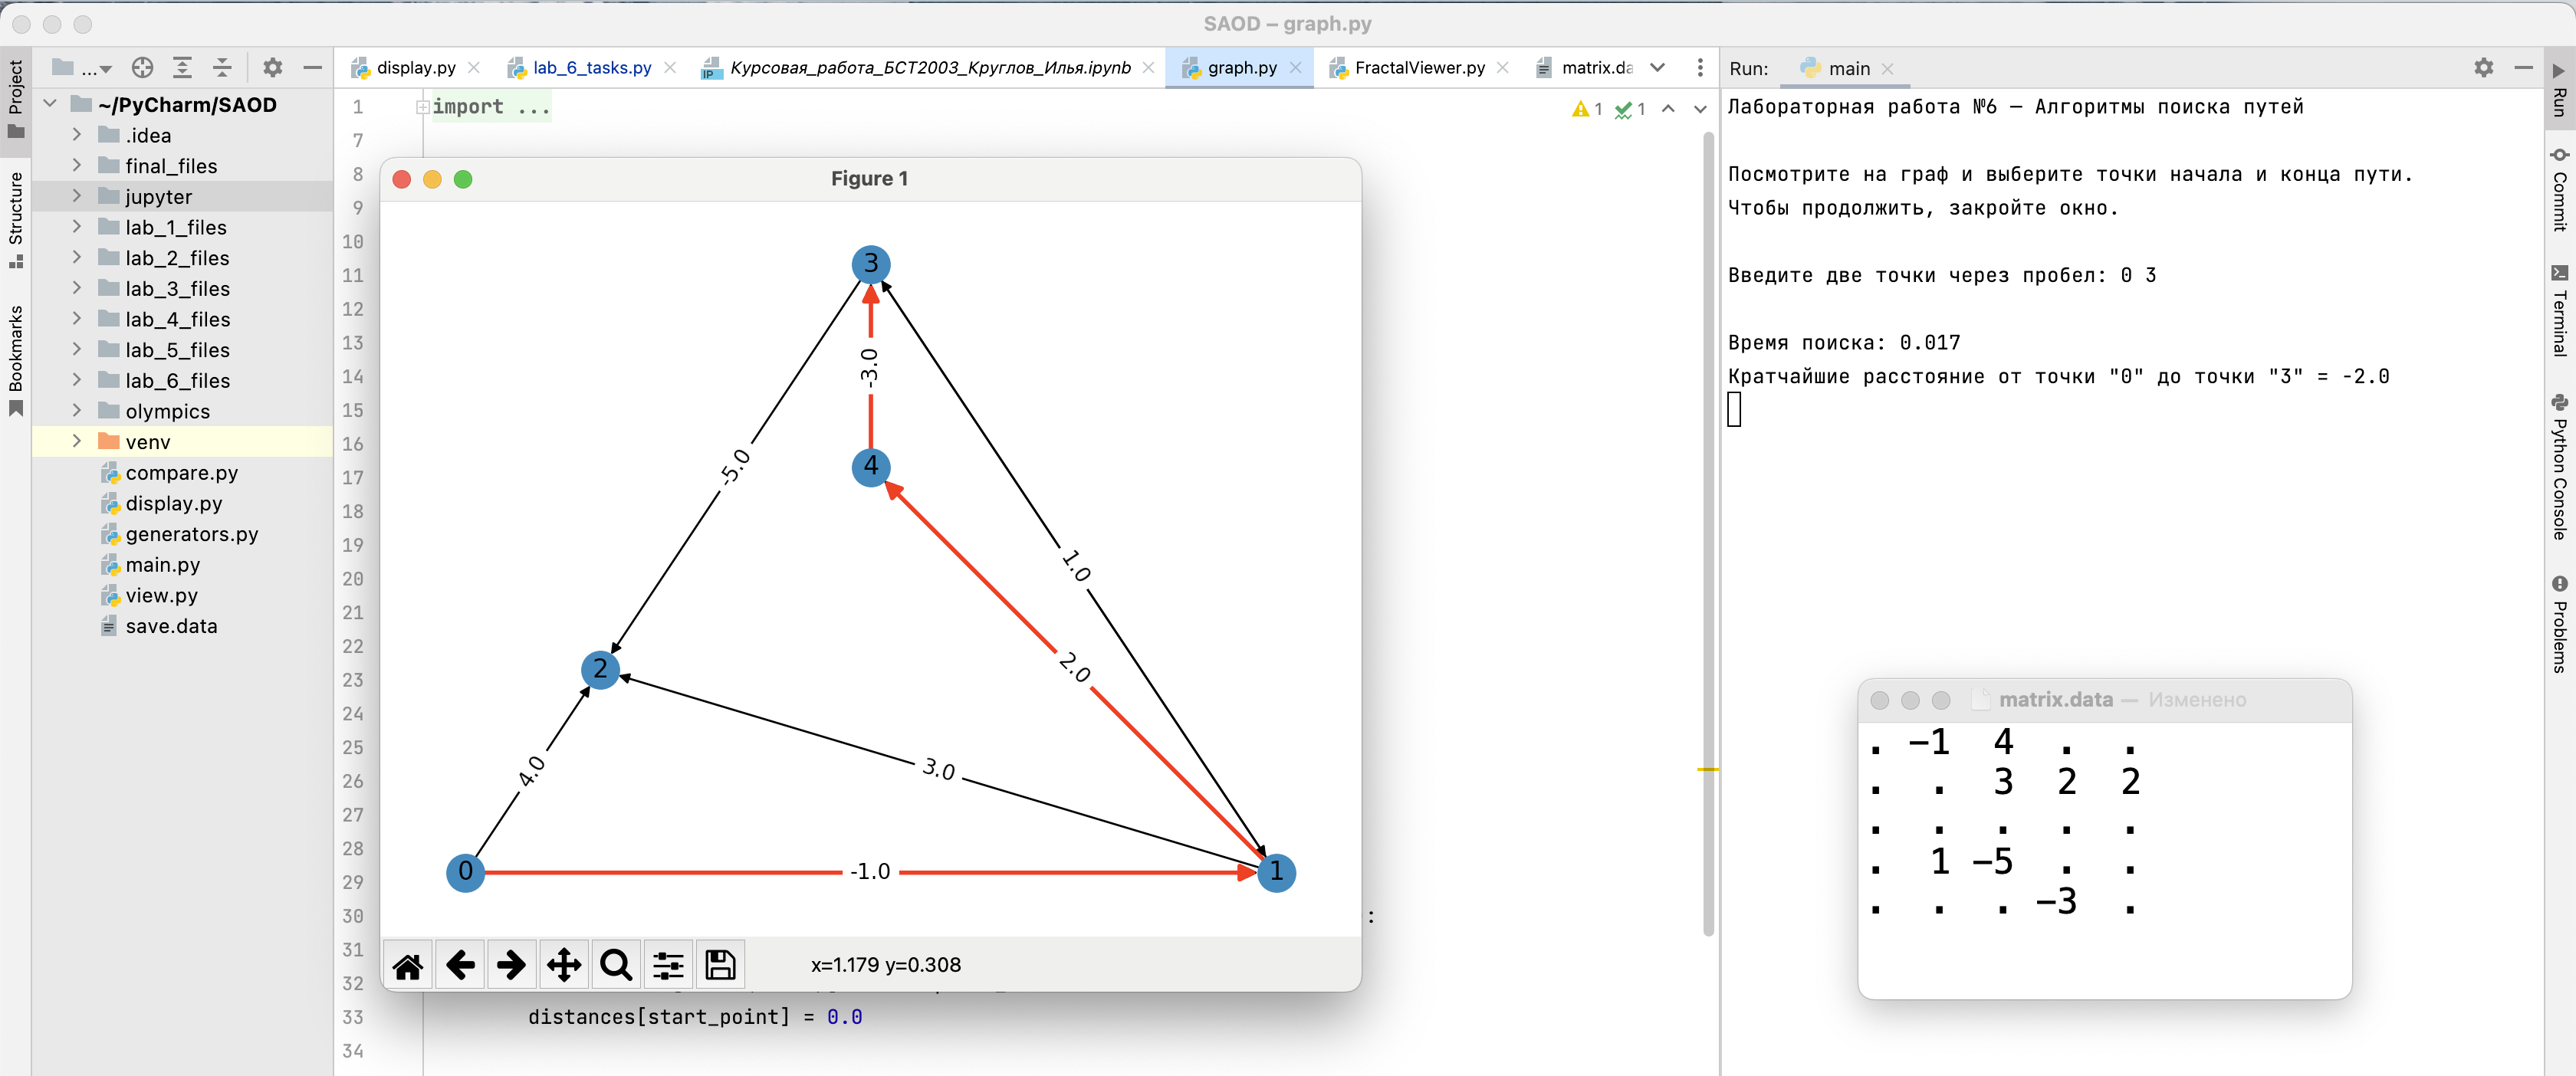